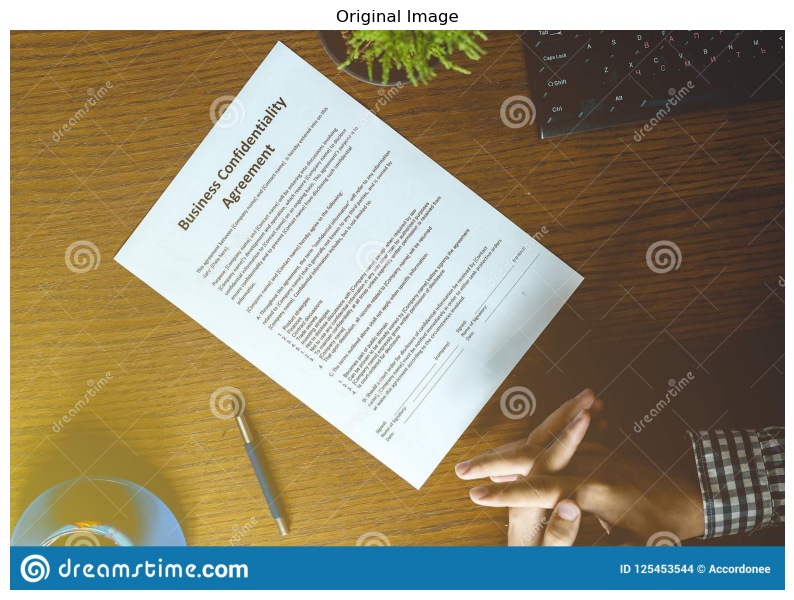

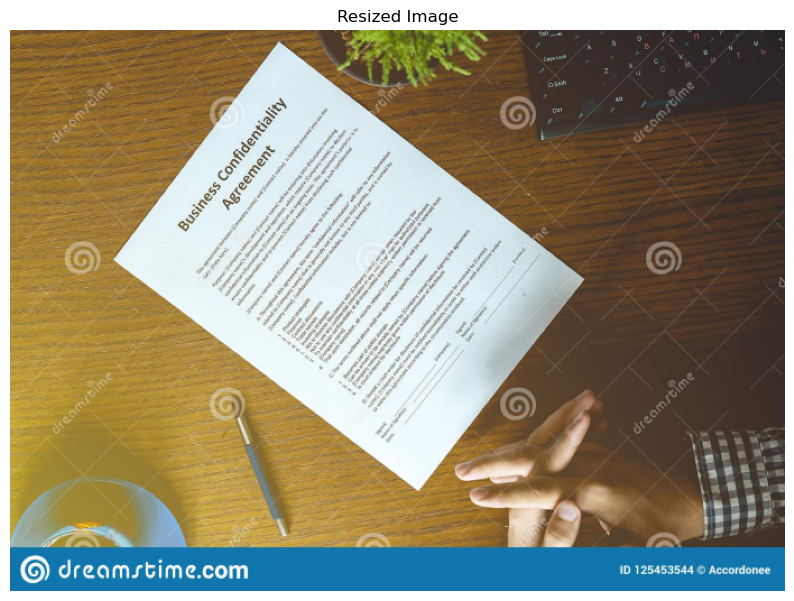

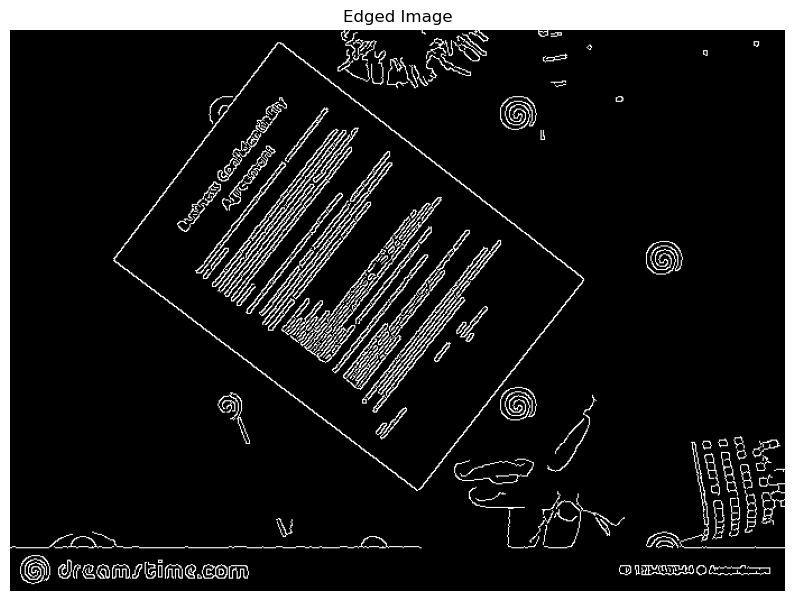

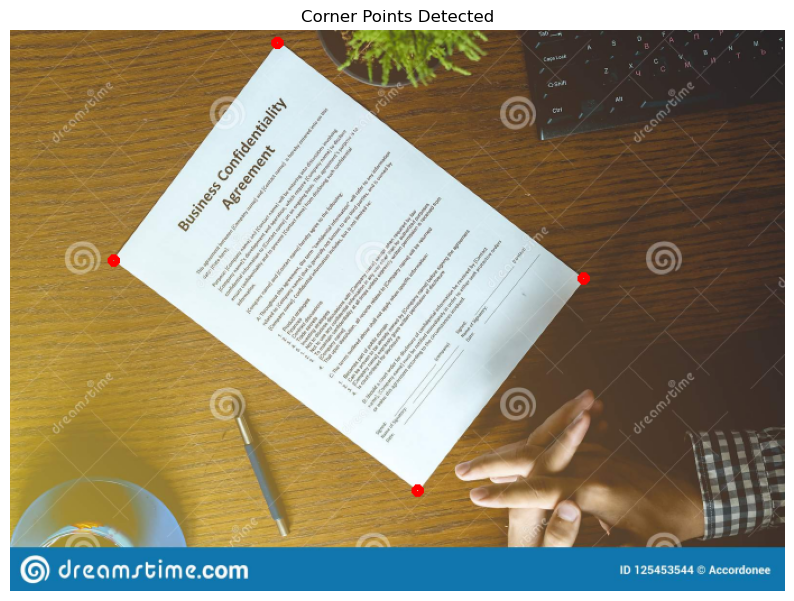

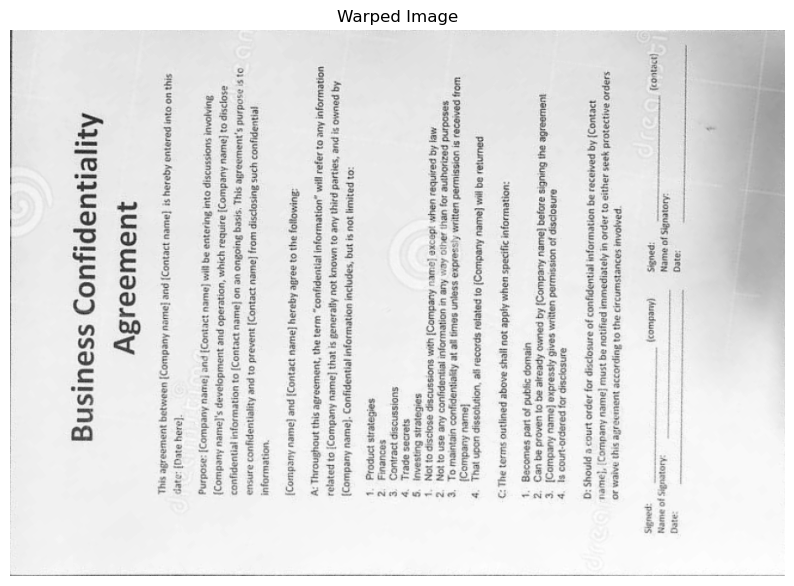

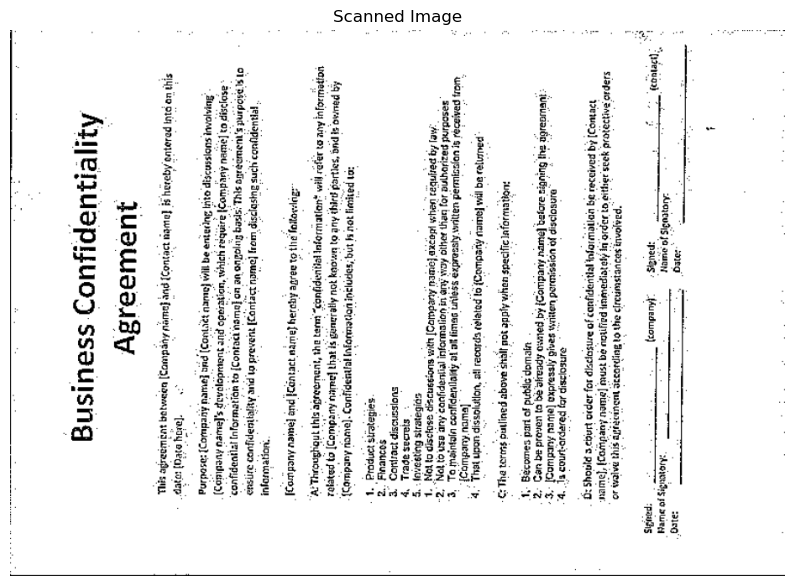

In [19]:
import cv2
import imutils
from skimage.filters import threshold_local
from pyimagesearch.transform import four_point_transform
import numpy as np
import matplotlib.pyplot as plt

def show_image(image, title="Image"):
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_gray_image(image, title="Image"):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

img_path = 'b.jpg'
big_img = cv2.imread(img_path)
show_image(big_img, "Original Image")

ratio = big_img.shape[0] / 500.0
org = big_img.copy()
img = imutils.resize(big_img, height=500)
show_image(img, "Resized Image")

gray_img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
edged_img = cv2.Canny(blur_img, 75, 200)
show_gray_image(edged_img, "Edged Image")

cnts, _ = cv2.findContours(edged_img.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        doc = approx
        break

p = []
for d in doc:
    tuple_point = tuple(d[0])
    cv2.circle(img, tuple_point, 3, (0, 0, 255), 4)
    p.append(tuple_point)
show_image(img, "Corner Points Detected")

warped = four_point_transform(org, doc.reshape(4, 2) * ratio)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
show_gray_image(imutils.resize(warped, height=650), "Warped Image")


T = threshold_local(warped, 11, offset=10, method="gaussian")
warped = (warped > T).astype("uint8") * 255
show_gray_image(imutils.resize(warped, height=650), "Scanned Image")
